# Exploration, visualizations and machine learning models of data frame consisting of all kinds of extracted data merged together 

# Imports

In [3]:
import joblib 

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import pickle

from scipy.stats import pearsonr
from scipy.stats import shapiro

import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB


from bi_functions_tobias import *

# Loading data frame from file

In [5]:
file_name = 'dataframes.h5'
key = "all_df"

df = pd.read_hdf(file_name, key)

# 1) Exploration of data

### 1.1) Getting an overview

Here I'm simply getting an overview of the data to have in mind for further analysis.

1) First I check the five first rows to be reminded which columns I have in this data frame and which values they contain 
  
2) Next I'm getting some info about the data to be reminded how many rows there is in this data frame and to be sure that the data type of each column is correct  
  
3) Third I'm checking the some descriptive measures of the data. This is to get a sense of the data's statistical measures like it's distribution, it's skewness and it's outliers. 

In [9]:
df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force
0,Austria,2012,7.400689,10.883644,0.945142,70.099998,0.919704,0.113814,0.770586,0.712150,0.156675,27.611,41.870248,1.3,5.2
1,Austria,2013,7.498803,10.878005,0.949809,70.199997,0.921734,0.164263,0.678937,0.725053,0.162603,28.031,42.740210,1.3,5.7
2,Austria,2014,6.950000,10.876781,0.898920,70.300003,0.885027,0.113623,0.566931,0.720965,0.170150,28.255,42.793747,1.3,6.0
3,Austria,2015,7.076447,10.875665,0.928110,70.400002,0.900305,0.094910,0.557480,0.747708,0.164469,28.261,43.211649,1.3,6.1
4,Austria,2016,7.048072,10.884549,0.926319,70.525002,0.888514,0.075823,0.523641,0.713451,0.197424,28.197,41.815396,1.3,6.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               222 non-null    object 
 1   Year                                  222 non-null    int64  
 2   Life Ladder                           222 non-null    float64
 3   Log GDP per capita                    222 non-null    float64
 4   Social support                        222 non-null    float64
 5   Healthy life expectancy at birth      222 non-null    float64
 6   Freedom to make life choices          222 non-null    float64
 7   Generosity                            222 non-null    float64
 8   Perceptions of corruption             222 non-null    float64
 9   Positive affect                       222 non-null    float64
 10  Negative affect                       222 non-null    float64
 11  Social expenditure as % 

In [11]:
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,2016.851351,6.672462,10.698365,0.923627,70.004595,0.837925,-0.003740,0.610499,0.692529,0.231583,23.158275,37.558377,0.733333,7.524775
std,3.176622,0.720369,0.332050,0.030477,1.907560,0.110212,0.153919,0.251083,0.072181,0.053677,5.069975,5.749821,2.903823,3.857445
min,2012.000000,4.683358,10.084578,0.834023,64.699997,0.494475,-0.296868,0.150607,0.471466,0.131619,12.779000,19.778489,-7.400000,2.200000
25%,2014.000000,6.092345,10.437841,0.906042,68.993750,0.778085,-0.128663,0.391869,0.635734,0.194434,18.878250,33.936933,-0.400000,5.000000
50%,2017.000000,6.760653,10.695198,0.928582,70.750000,0.879947,-0.025067,0.640041,0.706806,0.219370,23.068500,37.747397,1.200000,6.800000
75%,2020.000000,7.319477,10.883091,0.945684,71.375000,0.920727,0.121368,0.846873,0.747967,0.258437,27.726000,42.455641,2.200000,8.900000
max,2022.000000,7.889350,11.663788,0.984940,72.275002,0.964561,0.327282,0.959288,0.825601,0.387652,34.876000,50.285574,5.300000,26.100000


### 1.2) Visualizing statistical distribution and relationships in the data

This again is to get an overview of the data but now focused more on the descriptive statistics and the relations between the features. 

1) First I want to see the distributions of the data and thereby the outliers and the medians through box plots  
  
2) Second I want to get a different visualization of the distributions of the data through histograms
  
3) Third I want to calculate and visualize all the correlations between the features of the data through a correlation matrix

This will give me a sense of the data both for further analysis and for estimating if I should be concerned about outliers. It also give me an idea of how I should interpret the central tendency measures like the mean and median.  


##### Box plots

- I'm not showing box plots of the 'Country' and 'Year'columns because 'Country' is nominal data (so no distribution, mean and median) and I don't need any distribution of the 'Year'-data given that in this project I'm not concerned about how years are influencing the other features
  
- I'm standarzing the data to make the visualizations easier to interpret (without the standardization half of the box plots where squashed into flat boxes because of the different scales of the data) 

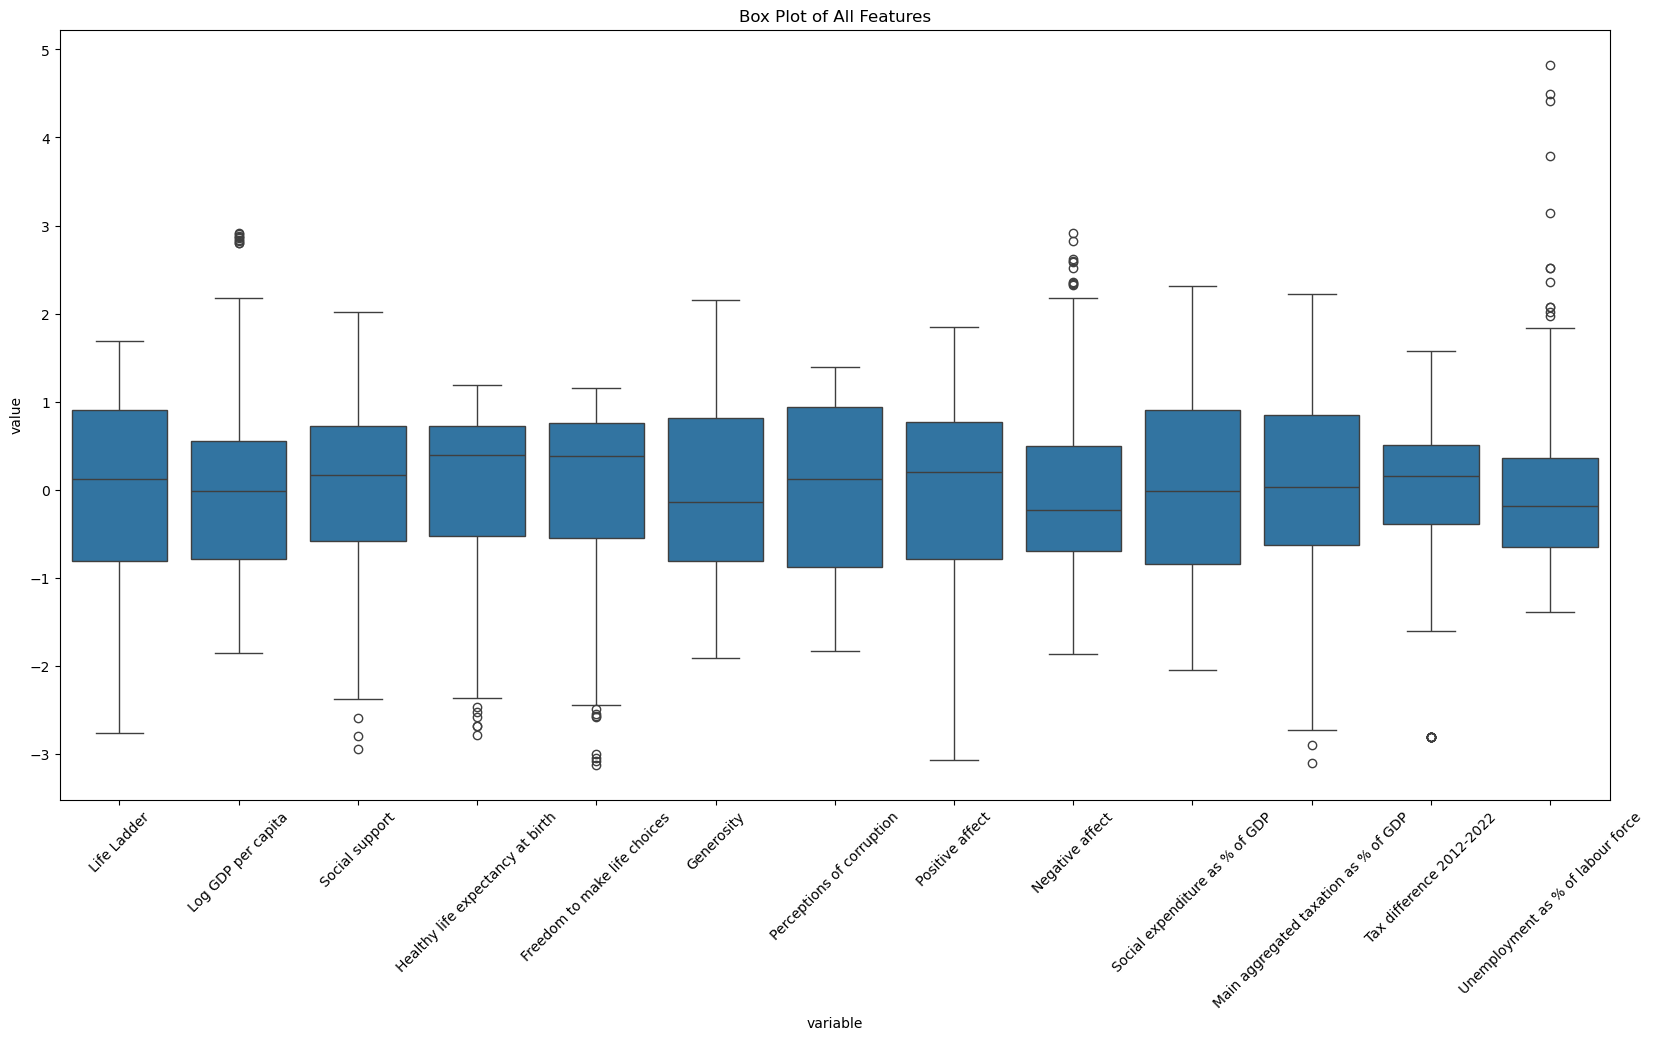

In [16]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df.drop(columns=["Country", "Year"])), columns=df.drop(columns=["Country", "Year"]).columns)

df_melted = df_standardized.melt()

plt.figure(figsize=(20, 10))
sns.boxplot(x='variable', y='value', data=df_melted)

plt.title("Box Plot of All Features")
plt.xticks(rotation=45) 
plt.show()

- I can see that 8 of the features has outliers
- The unemployment features seems to have the most outliers and some of them are very far away from the median and the interquartlie range. I will investigate that further later

##### Histograms

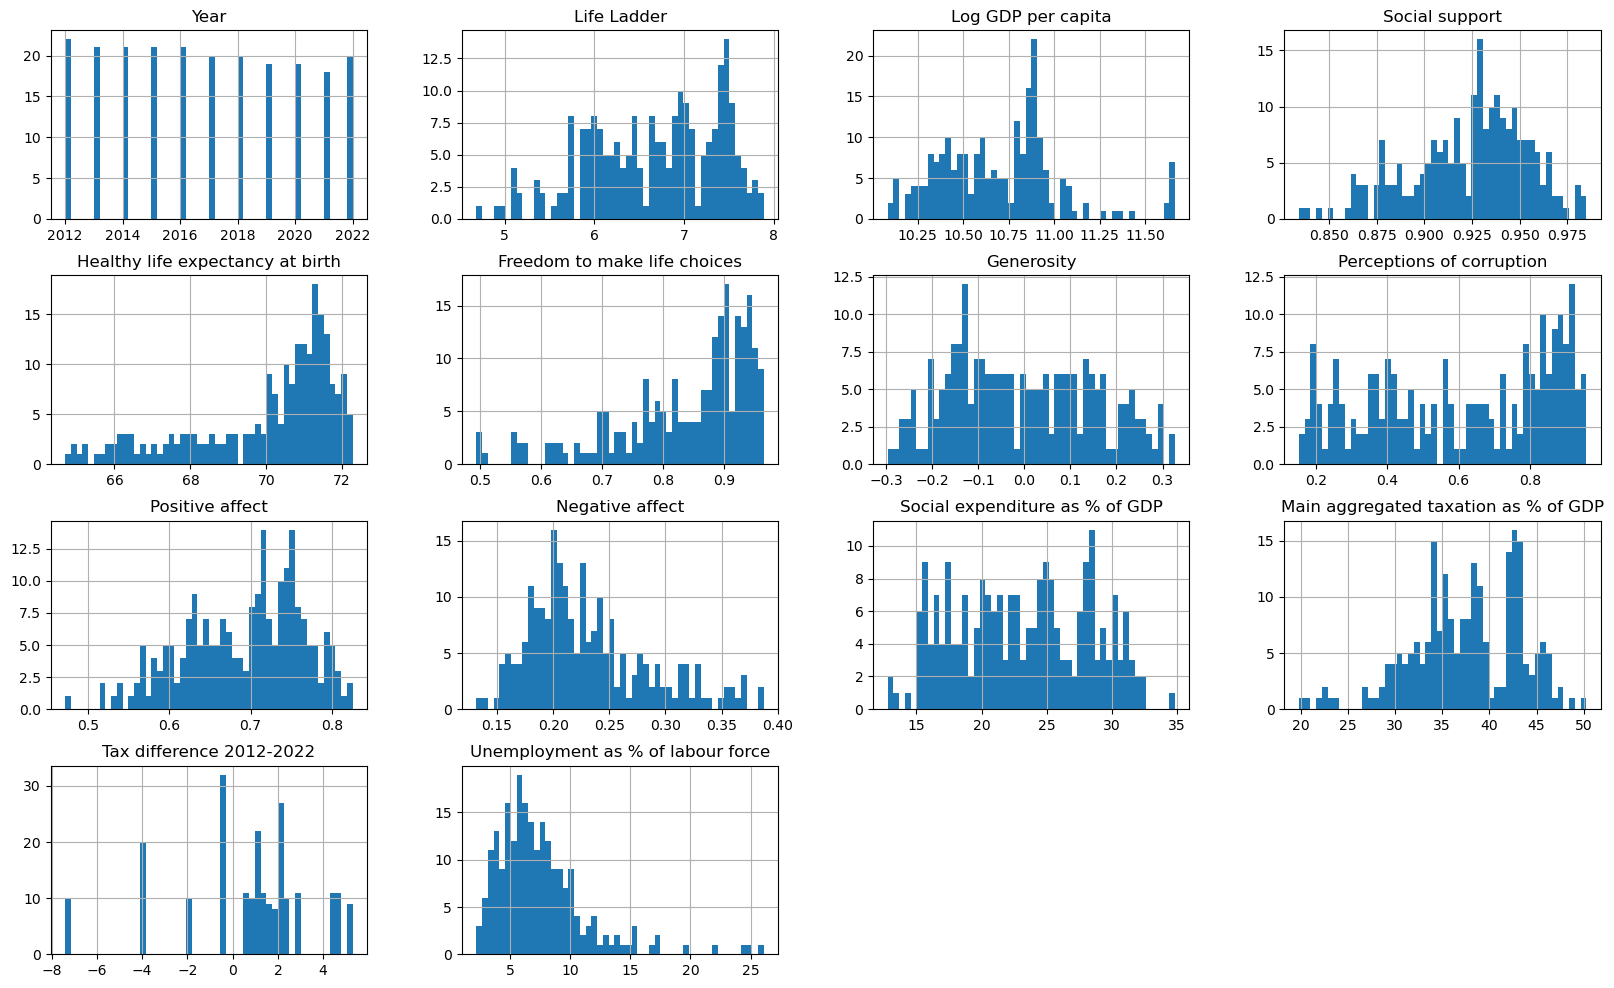

In [19]:
df.drop(columns="Country").hist(bins=50, figsize=(20, 12))

plt.show()

##### Correlation matrix

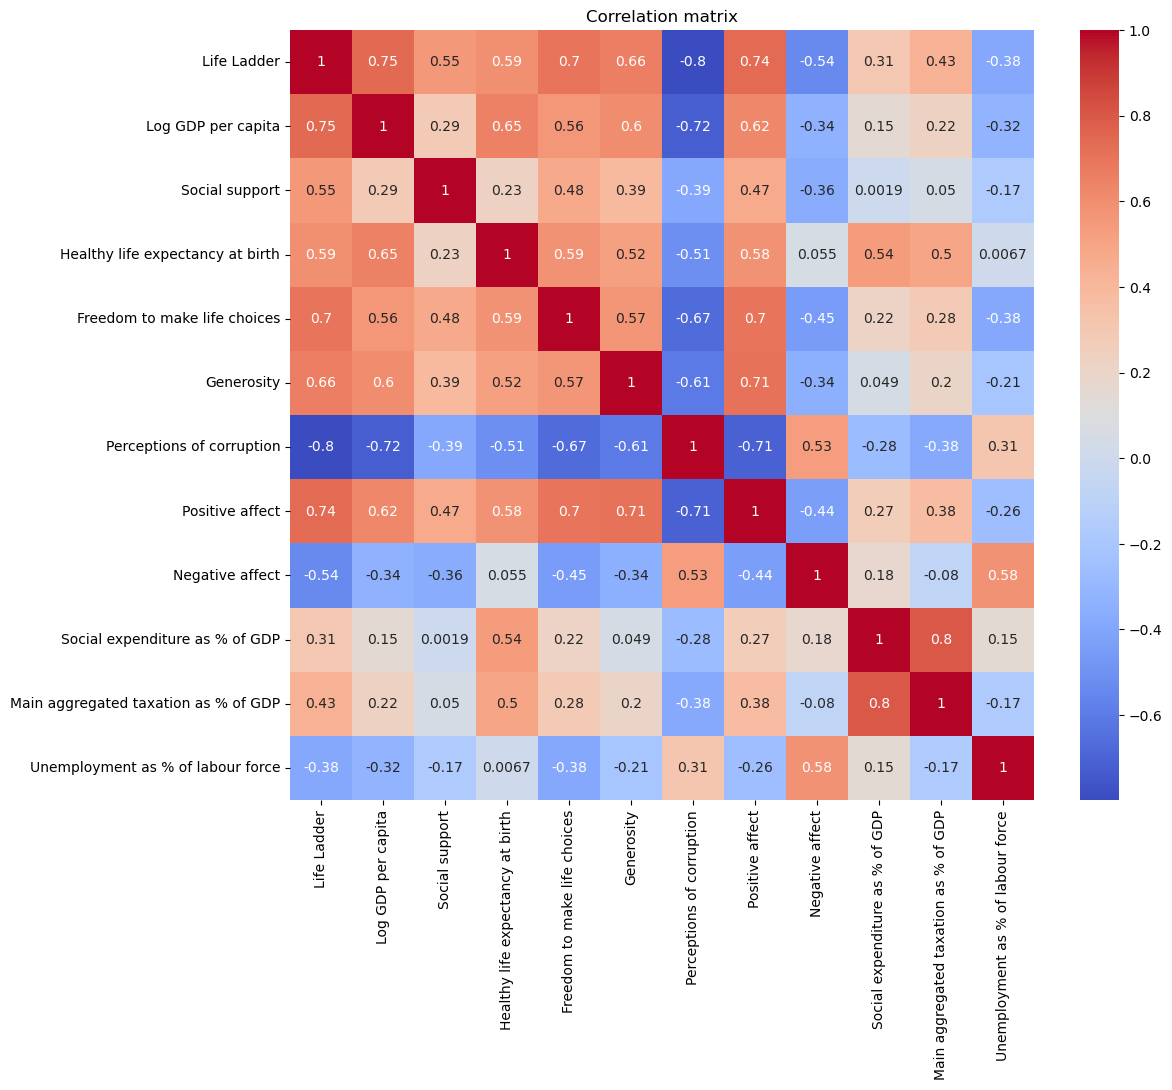

In [35]:
correlation_matrix = df.drop(columns= ["Country", "Year", "Tax difference 2012-2022"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

# 2) Visualizing interesting features of the data

### 2.1) Summarizing the data from 2012-2022 and visualizing it 

I'm getting the average social expenditure, average taxation, average unemployment and average gdp across the 10 years. This to show the difference in social expenditure, taxation and unemployment between the countries with the highest gdp and the countries with lowest gdp

#### 2.1.1) Collecting the average of the different selected features in data frames and merging them

##### Social expenditure

In [42]:
avg_social_exp_df = df.groupby('Country')['Social expenditure as % of GDP'].mean().reset_index()

avg_social_exp_df.head()

,Country,Social expenditure as % of GDP
0,Austria,28.634091
1,Belgium,28.970000
2,Czechia,20.384300
3,Denmark,28.999889
4,Estonia,17.278636


In [46]:
avg_tax_df = df.groupby('Country')['Main aggregated taxation as % of GDP'].mean().reset_index()

avg_tax_df.head()

,Country,Main aggregated taxation as % of GDP
0,Austria,42.557152
1,Belgium,44.437859
2,Czechia,35.137182
3,Denmark,46.179141
4,Estonia,32.853158


In [50]:
avg_unempl_df = df.groupby('Country')['Unemployment as % of labour force'].mean().reset_index()

avg_unempl_df.head()

,Country,Unemployment as % of labour force
0,Austria,5.672727
1,Belgium,7.070000
2,Czechia,4.190000
3,Denmark,5.966667
4,Estonia,6.672727


In [52]:
avg_gdp_df = df.groupby('Country')['Log GDP per capita'].mean().reset_index()

avg_gdp_df.head()

,Country,Log GDP per capita
0,Austria,10.894903
1,Belgium,10.821796
2,Czechia,10.530478
3,Denmark,10.910984
4,Estonia,10.420033


##### Merging 

In [55]:
step1_df = pd.merge(avg_social_exp_df, avg_tax_df, on =['Country'], how='inner') 
step2_df = pd.merge(step1_df, avg_unempl_df, on =['Country'], how='inner') 

all_avg_df = pd.merge(step2_df, avg_gdp_df, on =['Country'], how='inner') 
all_avg_df.head()

,Country,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Unemployment as % of labour force,Log GDP per capita
0,Austria,28.634091,42.557152,5.672727,10.894903
1,Belgium,28.970000,44.437859,7.070000,10.821796
2,Czechia,20.384300,35.137182,4.190000,10.530478
3,Denmark,28.999889,46.179141,5.966667,10.910984
4,Estonia,17.278636,32.853158,6.672727,10.420033


In [57]:
all_avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               22 non-null     object 
 1   Social expenditure as % of GDP        22 non-null     float64
 2   Main aggregated taxation as % of GDP  22 non-null     float64
 3   Unemployment as % of labour force     22 non-null     float64
 4   Log GDP per capita                    22 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1012.0+ bytes


#### 2.1.2) Plotting the summarized data of the countries with the highest and the lowest gdp

In [60]:

highest_gdp = all_avg_df.nlargest(3, 'Log GDP per capita')
lowest_gdp = all_avg_df.nsmallest(3, 'Log GDP per capita')

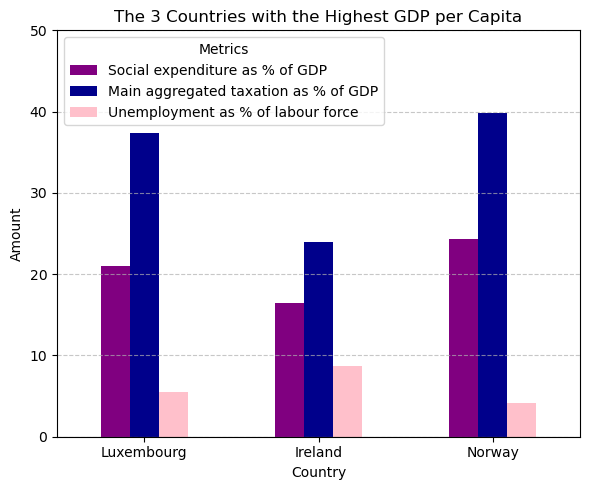

In [64]:

bar_colors = ['purple', 'darkblue', 'pink']

highest_gdp.plot(x='Country', y=['Social expenditure as % of GDP', 'Main aggregated taxation as % of GDP', 'Unemployment as % of labour force'], kind='bar', figsize=(6,5), color=bar_colors)

plt.ylim(0, 50)
plt.title('The 3 Countries with the Highest GDP per Capita')
plt.ylabel('Amount')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.axhline(0, color='grey', lw=0.8)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

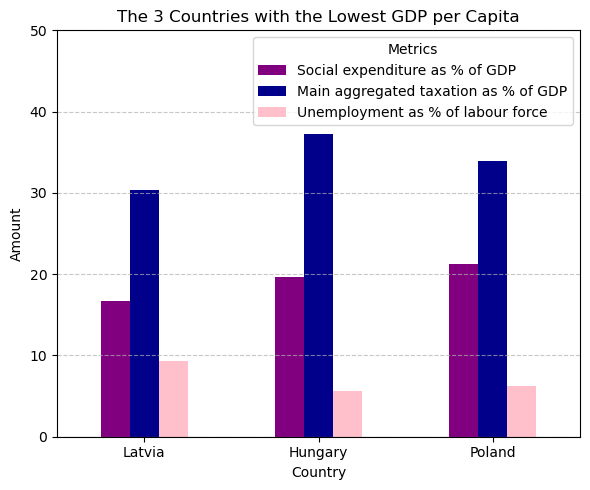

In [69]:
bar_colors = ['purple', 'darkblue', 'pink']
#gdp_minmax_df.plot(x='Country, y=['Social expenditure as % of GDP', 'Total taxation in %', 'Unemployment as percentage of labour force'], kind='bar', figsize=(10,6))
lowest_gdp.plot(x='Country', y=['Social expenditure as % of GDP', 'Main aggregated taxation as % of GDP', 'Unemployment as % of labour force'], kind='bar', figsize=(6,5), color=bar_colors)

plt.ylim(0, 50)
plt.title('The 3 Countries with the Lowest GDP per Capita')
plt.ylabel('Amount')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.axhline(0, color='grey', lw=0.8)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# 3) Creating LinearRegression() machine learning models for predicting GDP

In this part I will create different Machine Learning models to predict gdp  

I will start by preparing the data:   
1) First I will scale the data so the trained models won't be biased towards the features with a larger ranges.   
2) Second I will summarize the data of all the columns from the world happiness data set into one column. This is to avoid multicollinearity (some of these columns have a high correlation coefficient - 0.7 or above) and to get a more simple indicator of the happiness/well-being of a country. I'm summarizing by getting the mean of all the "positive" features, like 'Life ladder', 'Positive affect', 'Freedom to make life choices' etc., then getting the mean of all the "negative" features like 'Negative affect' and 'Perceptions of corruption' and then subtracting the negative from the positive features. The scaling of data is important for this too - without the scaling the different features wouldn't affect the mean equally.  
3) Third I will check the outliers of the features and assess if the outliers should be removed or kept.

Next I will split the data in train and test set, train the models and calculate validation measures. This I will do using my own function from bi_functions_tobias




### 3.1) Summarizing happiness features

##### 3.1.1) Scaling the df

In [76]:
minmax_scaler = MinMaxScaler()

numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object','int64']).columns

df_scaled = df.copy()  #
df_scaled[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])


df_scaled.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force
0,Austria,2012,0.847579,0.505991,0.736295,0.712871,0.904577,0.657985,0.766654,0.679639,0.097862,0.671222,0.724152,0.685039,0.125523
1,Austria,2013,0.878182,0.502420,0.767218,0.726072,0.908896,0.738813,0.653322,0.716075,0.121017,0.690229,0.752668,0.685039,0.146444
2,Austria,2014,0.707002,0.501645,0.430022,0.739274,0.830809,0.657680,0.514818,0.704532,0.150490,0.700367,0.754423,0.685039,0.158996
3,Austria,2015,0.746443,0.500938,0.623438,0.752475,0.863310,0.627697,0.503131,0.780046,0.128304,0.700638,0.768122,0.685039,0.163180
4,Austria,2016,0.737592,0.506564,0.611566,0.768977,0.838227,0.597118,0.461286,0.683312,0.257017,0.697742,0.722354,0.685039,0.179916


##### 3.1.2) Calculating the summarized happiness feature and storing in a new df

In [79]:
df_scaled['Mean positive happinnes measures'] = df_scaled[['Life Ladder', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Positive affect']].mean(axis=1)
df_scaled['Mean negative happinnes measures'] = df_scaled[['Perceptions of corruption', 'Negative affect']].mean(axis=1)
df_scaled['Mean poshap without Life Ladder'] = df_scaled[['Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Positive affect']].mean(axis=1)

df_scaled['Collected happiness measure'] = df_scaled['Mean positive happinnes measures'] - df_scaled['Mean negative happinnes measures']
df_scaled['Collected happiness measure no Life Ladder'] = df_scaled['Mean poshap without Life Ladder'] - df_scaled['Mean negative happinnes measures']

df_scaled.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force,Mean positive happinnes measures,Mean negative happinnes measures,Mean poshap without Life Ladder,Collected happiness measure,Collected happiness measure no Life Ladder
0,Austria,2012,0.847579,0.505991,0.736295,0.712871,0.904577,0.657985,0.766654,0.679639,0.097862,0.671222,0.724152,0.685039,0.125523,0.756491,0.432258,0.738273,0.324233,0.306016
1,Austria,2013,0.878182,0.502420,0.767218,0.726072,0.908896,0.738813,0.653322,0.716075,0.121017,0.690229,0.752668,0.685039,0.146444,0.789209,0.387170,0.771415,0.402040,0.384245
2,Austria,2014,0.707002,0.501645,0.430022,0.739274,0.830809,0.657680,0.514818,0.704532,0.150490,0.700367,0.754423,0.685039,0.158996,0.678220,0.332654,0.672464,0.345566,0.339809
3,Austria,2015,0.746443,0.500938,0.623438,0.752475,0.863310,0.627697,0.503131,0.780046,0.128304,0.700638,0.768122,0.685039,0.163180,0.732235,0.315717,0.729394,0.416518,0.413676
4,Austria,2016,0.737592,0.506564,0.611566,0.768977,0.838227,0.597118,0.461286,0.683312,0.257017,0.697742,0.722354,0.685039,0.179916,0.706132,0.359152,0.699840,0.346981,0.340689


In [83]:
simple_df = df_scaled[["Country", "Year", "Log GDP per capita", "Life Ladder", "Social expenditure as % of GDP", "Main aggregated taxation as % of GDP", "Unemployment as % of labour force", "Collected happiness measure", "Collected happiness measure no Life Ladder"]]
simple_df.head()

,Country,Year,Log GDP per capita,Life Ladder,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Unemployment as % of labour force,Collected happiness measure,Collected happiness measure no Life Ladder
0,Austria,2012,0.505991,0.847579,0.671222,0.724152,0.125523,0.324233,0.306016
1,Austria,2013,0.502420,0.878182,0.690229,0.752668,0.146444,0.402040,0.384245
2,Austria,2014,0.501645,0.707002,0.700367,0.754423,0.158996,0.345566,0.339809
3,Austria,2015,0.500938,0.746443,0.700638,0.768122,0.163180,0.416518,0.413676
4,Austria,2016,0.506564,0.737592,0.697742,0.722354,0.179916,0.346981,0.340689


##### 3.1.3) Checking if my collected happiness feature is redundant because of the Life Ladder feature

The Life Ladder feature is a measure of peoples perceived happiness at the time of the data was collected. They asked participants to estimates their life from 1 to 10, 10 being best possible life and 1 worst possible life.  It's a possibilyt that this measure highly correlates with my collected measure of happiness. I'm checking this with a correlation matrix

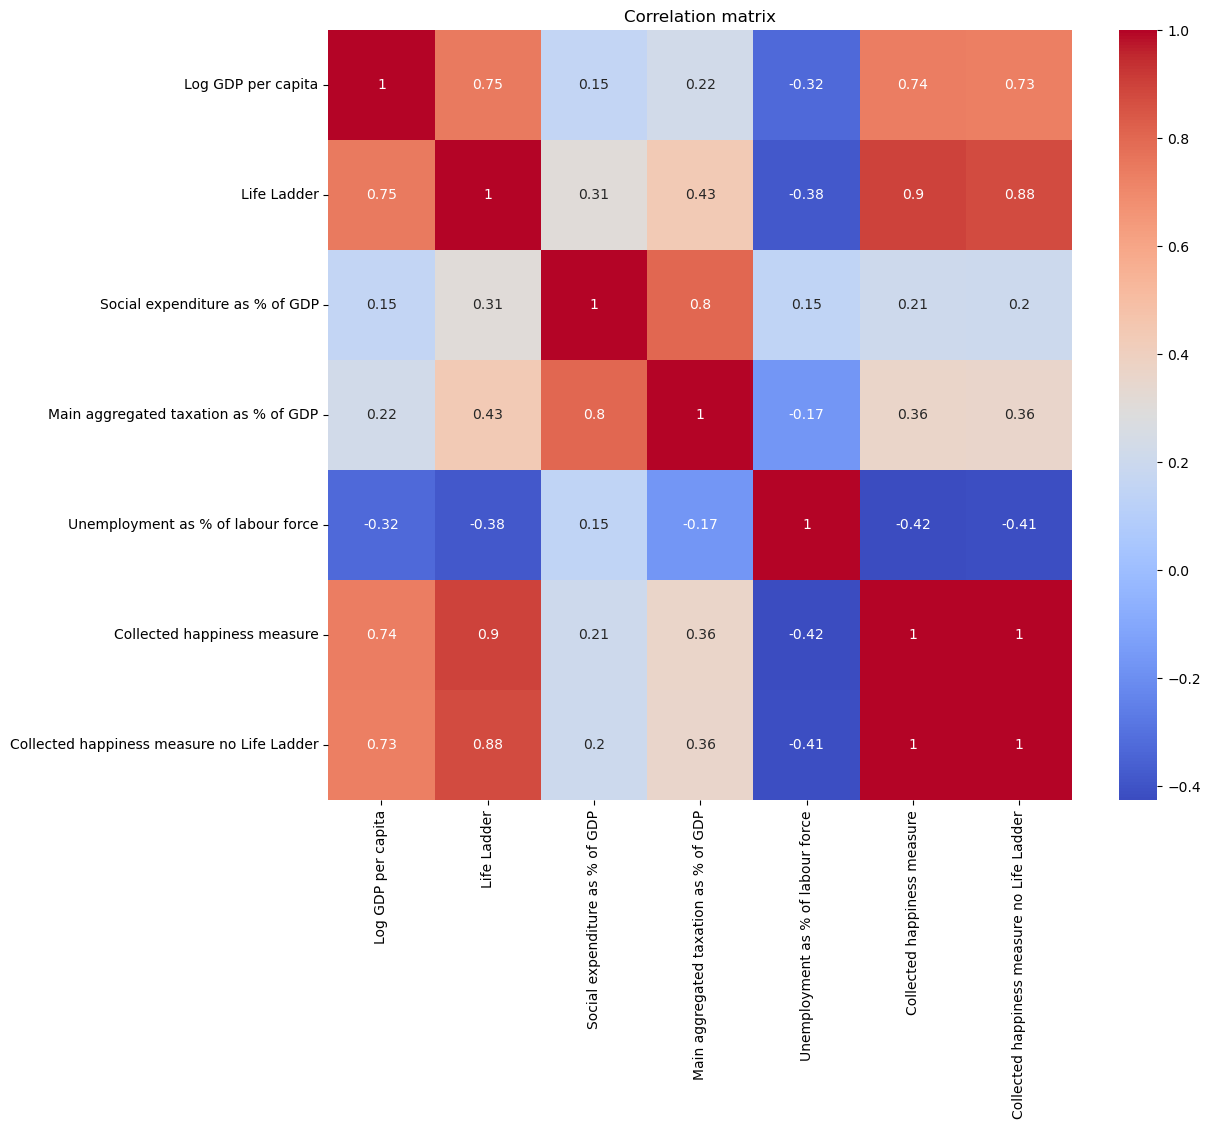

In [87]:
corr_m_simple_df = simple_df.drop(columns= ["Country", "Year"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_m_simple_df, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

It very much seems like my collected happiness feature is redundant. I therefore not use it and instead use the Life Ladder feature

### 3.2) Checking and assessing outliers  

##### 3.2.1) Investigating the outliers in 'Unemployment ...', 'Total taxation in %' and 'Log GDP per capita' 

<Axes: >

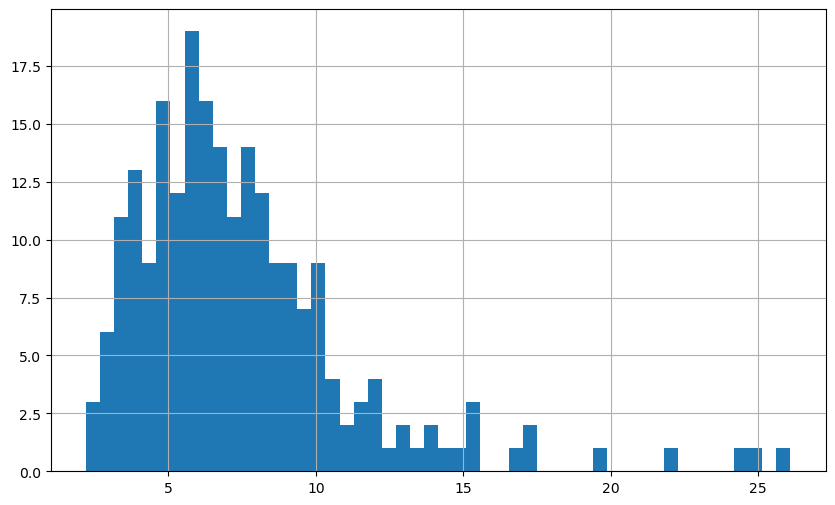

In [96]:
df["Unemployment as % of labour force"].hist(bins=50, figsize=(10,6))

<Axes: >

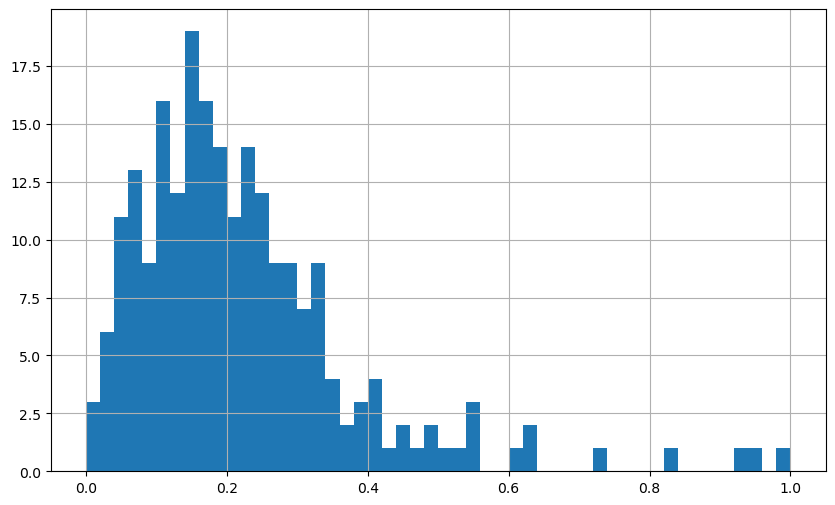

In [100]:
simple_df["Unemployment as % of labour force"].hist(bins=50, figsize=(10,6))

<Axes: >

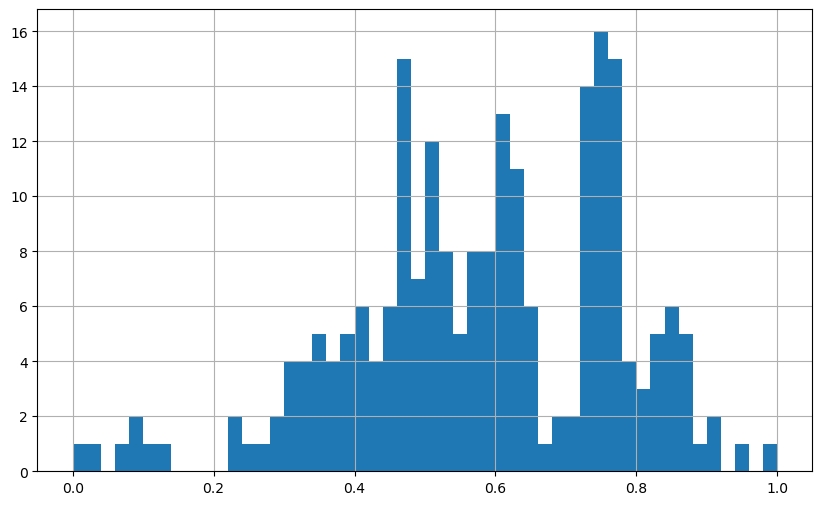

In [104]:
simple_df["Main aggregated taxation as % of GDP"].hist(bins=50, figsize=(10,6))

In [108]:
no_outliers_df = calculate_outliers(simple_df, True, False, True, 1.5, "Unemployment as % of labour force", "Main aggregated taxation as % of GDP", "Log GDP per capita")

Outliers only calculated for the column arguments
Number of outliers in Unemployment as % of labour force: 12
Number of outliers in Main aggregated taxation as % of GDP: 2
Number of outliers in Log GDP per capita: 9
Total number of rows deleted in returned data frame: 22
Total number of outliers (if there are more outliers than deleted rows it means that some rows contain outliers in more than one column): 23


In [110]:
no_outliers_df.head()

,Country,Year,Log GDP per capita,Life Ladder,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Unemployment as % of labour force,Collected happiness measure,Collected happiness measure no Life Ladder,ID
0,Austria,2012,0.505991,0.847579,0.671222,0.724152,0.125523,0.324233,0.306016,1
1,Austria,2013,0.502420,0.878182,0.690229,0.752668,0.146444,0.402040,0.384245,2
2,Austria,2014,0.501645,0.707002,0.700367,0.754423,0.158996,0.345566,0.339809,3
3,Austria,2015,0.500938,0.746443,0.700638,0.768122,0.163180,0.416518,0.413676,4
4,Austria,2016,0.506564,0.737592,0.697742,0.722354,0.179916,0.346981,0.340689,5


In [112]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 221
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Log GDP per capita                          200 non-null    float64
 3   Life Ladder                                 200 non-null    float64
 4   Social expenditure as % of GDP              200 non-null    float64
 5   Main aggregated taxation as % of GDP        200 non-null    float64
 6   Unemployment as % of labour force           200 non-null    float64
 7   Collected happiness measure                 200 non-null    float64
 8   Collected happiness measure no Life Ladder  200 non-null    float64
 9   ID                                          200 non-null    int64  
dtypes: float64(7), int6

In [116]:
dict_of_outliers_info = calculate_outliers(df, False, False, True, 1.5, "Unemployment as % of labour force", "Main aggregated taxation as % of GDP", "Log GDP per capita")
unempl_out_df = dict_of_outliers_info["Unemployment as % of labour force"]["outliers"]
unempl_out_df.iloc[0:14]

Outliers only calculated for the column arguments
Number of outliers in Unemployment as % of labour force: 12
Number of outliers in Main aggregated taxation as % of GDP: 2
Number of outliers in Log GDP per capita: 9
Total number of rows deleted in returned data frame: 22
Total number of outliers (if there are more outliers than deleted rows it means that some rows contain outliers in more than one column): 23


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force,ID
99,Ireland,2012,6.964645,10.887104,0.961786,70.339996,0.902195,0.297068,0.572632,0.721398,0.236662,23.048,28.280290,-7.4,15.5,100
119,Latvia,2012,5.125025,10.084578,0.851195,64.900002,0.563812,-0.041643,0.894979,0.588139,0.232225,15.322,29.075687,1.2,15.1,120
180,Portugal,2012,4.993962,10.314162,0.866039,69.779999,0.773821,-0.100899,0.959288,0.631480,0.370170,24.332,31.665831,4.3,16.6,181
181,Portugal,2013,5.157688,10.310381,0.867181,70.019997,0.788033,-0.122254,0.946257,0.664724,0.347898,25.413,33.965581,4.3,17.2,182
202,Spain,2012,6.290690,10.484292,0.937023,71.239998,0.754586,-0.063294,0.843593,0.644379,0.366474,25.550,32.410892,5.3,24.8,203
203,Spain,2013,6.150027,10.473435,0.928640,71.360001,0.759356,-0.105331,0.915823,0.662719,0.371839,25.705,33.146921,5.3,26.1,204
204,Spain,2014,6.456478,10.490287,0.947864,71.480003,0.738472,-0.032065,0.853888,0.682676,0.335460,25.373,33.914128,5.3,24.5,205
205,Spain,2015,6.380663,10.528729,0.956472,71.599998,0.732000,-0.076274,0.821665,0.704702,0.284694,24.707,33.878463,5.3,22.1,206
206,Spain,2016,6.318612,10.557811,0.941737,71.724998,0.768174,-0.052054,0.818559,0.629934,0.300829,24.245,33.650150,5.3,19.6,207
207,Spain,2017,6.230173,10.584788,0.903158,71.849998,0.755561,-0.036108,0.791269,0.601179,0.302388,23.927,33.932363,5.3,17.2,208


In [118]:
unempl_out_df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force,ID
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2014.500000,6.090293,10.484079,0.917195,70.707916,0.753460,-0.044723,0.827036,0.653170,0.318537,24.403333,32.966297,3.733333,19.125000,186.333333
std,2.713602,0.636067,0.193761,0.037697,1.989692,0.075379,0.112367,0.105862,0.039379,0.048920,3.512827,2.378774,3.700696,4.153011,37.227393
min,2012.000000,4.993962,10.084578,0.851195,64.900002,0.563812,-0.124828,0.572632,0.588139,0.232225,15.322000,28.280290,-7.400000,15.100000,100.000000
25%,2012.000000,5.901942,10.433617,0.894164,70.259996,0.736854,-0.102007,0.787578,0.631093,0.296795,24.007250,32.224627,4.300000,15.500000,181.750000
50%,2013.500000,6.304651,10.490335,0.931788,71.420002,0.757459,-0.069784,0.832629,0.653549,0.326039,24.519500,33.764307,5.300000,17.200000,204.500000
75%,2016.250000,6.467902,10.564555,0.943269,71.756248,0.776180,-0.040259,0.900190,0.674017,0.359512,25.447250,33.940668,5.300000,22.700000,207.250000
max,2020.000000,6.964645,10.887104,0.961786,72.224998,0.902195,0.297068,0.959288,0.721398,0.371839,31.184000,36.955076,5.300000,26.100000,211.000000


In [122]:
tax_out_df = dict_of_outliers_info["Main aggregated taxation as % of GDP"]["outliers"]
tax_out_df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force,ID
107,Ireland,2020,7.034931,11.419710,0.960311,71.199997,0.882098,0.002065,0.355633,0.752609,0.246447,15.694,19.778489,-7.4,5.9,108
108,Ireland,2022,6.869864,11.624914,0.906079,71.400002,0.895010,0.140264,0.357812,0.737860,0.234126,12.779,20.920360,-7.4,4.5,109


In [124]:
gdp_out_df = dict_of_outliers_info["Log GDP per capita"]["outliers"]
gdp_out_df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Main aggregated taxation as % of GDP,Tax difference 2012-2022,Unemployment as % of labour force,ID
108,Ireland,2022,6.869864,11.624914,0.906079,71.400002,0.895010,0.140264,0.357812,0.737860,0.234126,12.779,20.920360,-7.4,4.5,109
141,Luxembourg,2012,6.964097,11.627478,0.913908,70.900002,0.916521,0.049343,0.402753,0.725600,0.227412,20.726,36.504378,1.9,5.1,142
142,Luxembourg,2013,7.130809,11.635592,0.916683,71.099998,0.789655,-0.063245,0.300812,0.600761,0.184800,20.889,36.281661,1.9,5.9,143
143,Luxembourg,2014,6.891127,11.637915,0.875469,71.300003,0.937988,0.098004,0.366287,0.760254,0.170409,20.815,36.158583,1.9,5.9,144
144,Luxembourg,2016,6.967341,11.663788,0.941261,71.525002,0.882365,0.011961,0.356336,0.706499,0.192301,20.251,35.546478,1.9,6.3,145


####

#### 3.2.2) Assessing whether outliers should be included in my LinearRegression() models (polynomial model included)

My main goal with the models is to predict GDP from the different features in my data set. The outliers of the unemployment feature and the taxation feature seems to be valid outliers. That is they don't seem to be wrongly entered data: Aall the outlier values fits with the rest of these countries data: Ireland generally has a low taxation. Spain generally has a high unemployment rate and Luxembourg generally has a high GDP per capita.   
There seems to be no reason to exclude these data points given that they provide valuable insight into whether there is a correlation between the given features and GDP. 


### 3.3) Training and testing LinearRegression() machine learning models (polynomial model included)

##### Simple linear regression model (1 feature = Life Ladder)

In [131]:
X_feature = ["Life Ladder"]
simple_lin_model = train_and_test_linear_model(simple_df, "Log GDP per capita", X_feature, .3, False)

               Metric  Value
0                 MAE  0.097
1                 MSE  0.023
2                RMSE  0.152
3  Explained Variance  0.487
4           R-Squared  0.482


##### Mutliple linear regression model

In [138]:
X_features = ["Life Ladder", "Social expenditure as % of GDP", "Main aggregated taxation as % of GDP", "Unemployment as % of labour force"]
multiple_lin_model = train_and_test_linear_model(simple_df, "Log GDP per capita", X_features, .3, False)

               Metric  Value
0                 MAE  0.115
1                 MSE  0.026
2                RMSE  0.162
3  Explained Variance  0.422
4           R-Squared  0.408


##### Polynomial regression model

Poly degree: 2

In [142]:
poly_2_degree = train_and_test_linear_model(simple_df, "Log GDP per capita", X_features, .3, True, 2)

               Metric  Value
0                 MAE  0.081
1                 MSE  0.021
2                RMSE  0.143
3  Explained Variance  0.538
4           R-Squared  0.538


Poly degree 3

In [145]:
poly_3_degree = train_and_test_linear_model(simple_df, "Log GDP per capita", X_features, .3, True, 3)

               Metric  Value
0                 MAE  0.087
1                 MSE  0.020
2                RMSE  0.143
3  Explained Variance  0.544
4           R-Squared  0.538


None of my regression models are good at predicting GDP. R-Squared of the tested model is beneath 0.7

# 4) Creating Decision tree for predicting GDP

In [159]:
X_scaled = df[["Life Ladder", "Social expenditure as % of GDP", "Main aggregated taxation as % of GDP", "Unemployment as % of labour force"]]
y_scaled = df['Log GDP per capita'] 


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)

dec_model = DecisionTreeRegressor(random_state=42)
dec_model.fit(X_train, y_train)


predictions = dec_model.predict(X_test)


mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = metrics.r2_score(y_test, predictions)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

Mean Absolute Error: 0.10060626357348997
Mean Squared Error: 0.03716481832455416
Root Mean Squared Error: 0.1927817894007475
R-Squared: 0.6641366097269772


### 4.2) Checking the feature importance score

In [162]:
importances = dec_model.feature_importances_
feature_names = X_scaled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head()

,Feature,Importance
0,Life Ladder,0.776373
2,Main aggregated taxation as % of GDP,0.102465
3,Unemployment as % of labour force,0.075176
1,Social expenditure as % of GDP,0.045986


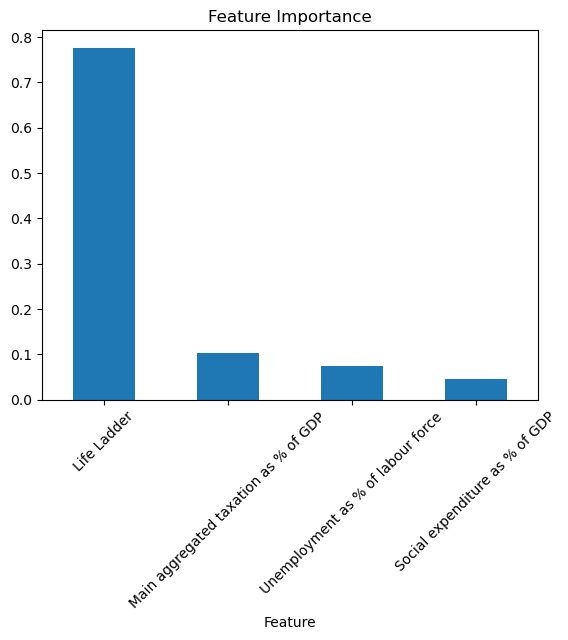

In [153]:
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()